# ***Proyecto de clasificación de reviews utilizando NLP***

In [ ]:
!pip install missingpy
!pip install wordcloud
!pip install transformers
!pip install lightgbm
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 119.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 40.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import string
from transformers import pipeline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
air = pd.read_csv('AirlineReviews.csv')
air.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


* ```Aircraft```: The model of aircraft
* ```AirlineName```: The airline flown on
* ```CabinType```: What type of cabin class flown in
* ```DateFlown```: When the flight(s) took place
* ```DatePub```: When the review was published
* ```EntertainmentRating```: Rating of entertainment
* ```FoodRating```: Rating of food
* ```GroundServiceRating```: Rating of ground service
* ```OriginCountry```: Reviewers' country of origin
* ```OverallScore```: Overall rating of the airline
* ```Recommended```: Whether the airline is recommended or not
* ```Review```: Text-based review of trip taken
* ```Route```: Route flown
* ```SeatComfortRating```: Rating of seats
* ```ServiceRating```: Rating of service
* ```Slug```: Airline slug on airlinequality.com
* ```ServiceRating```: Rating of service
* ```Title```: Title of review
* ```TravelType```: Reason for trip
* ```TripVerified```: Whether trip have been verified by airlinequality.com or not
* ```ValueRating```: Rating of value for money
* ```WifiRating```: Rating of in-flight wi-fi experience
* ```unique_id```: A unique id for each review




## Data wrangling

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

Se calculan los porcentajes de datos nulos para cada columna.

In [ ]:
air.isna().sum()*100/len(air)

Aircraft               71.863582
AirlineName             0.000000
CabinType               2.331312
DateFlown              29.710710
DatePub                 0.000000
EntertainmentRating     0.000000
FoodRating              0.000000
GroundServiceRating     0.000000
OriginCountry           1.296203
OverallScore            3.345564
Recommended             0.000000
Review                  0.636515
Route                  29.840485
SeatComfortRating       0.000000
ServiceRating           0.000000
Slug                    0.000000
Title                   0.003090
TravelType             29.592522
TripVerified           54.031903
ValueRating             0.000000
WifiRating              0.000000
unique_id               0.000000
dtype: float64

En general, los porcentajes mayores a 25-30% de nulos para una columna resultan inexactos para imputar; y siendo el tipo de aeronave, fecha de vuelo, ruta, título y verificación, datos no relevantes para el análisis que realizaremos, podemos entonces descartar dichas columnas.

In [ ]:
air.drop(columns=['Aircraft', 'DateFlown', 'Route', 'Title', 'TripVerified'], inplace=True)

Por otro lado, ya que nuestro modelo se basará en las reviews escritas por los pasajeros, desecharemos las filas con reviews en blanco.

In [ ]:
air.dropna(subset=['Review'], inplace=True)
air = air.reset_index(drop=True)

Los nulos correspondientes a ```TravelType```, ```CabinType``` y ```OriginCountry``` son modalidades de viaje, tipo de cabina y pais de origen no informados. En todos los casos, podemos sustituirlos por una nueva categoria: "*Unknown*".

In [ ]:
air.TravelType.fillna('Unknown', inplace=True)
air.CabinType.fillna('Unknown', inplace=True)
air.OriginCountry.fillna('Unknown', inplace=True)


### MissForest

En la columna ```OverallScore```, utilizaremos para la imputación de sus nulos un algoritmo de RandomForest diseñado especificamente para dicho fin llamado 'MissForest'.

In [ ]:
imputer = MissForest(criterion='squared_error')
imputed = imputer.fit_transform(air[['OverallScore', 'EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'WifiRating']])
data_imp = pd.DataFrame(imputed)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


Text(0.5, 0, '')

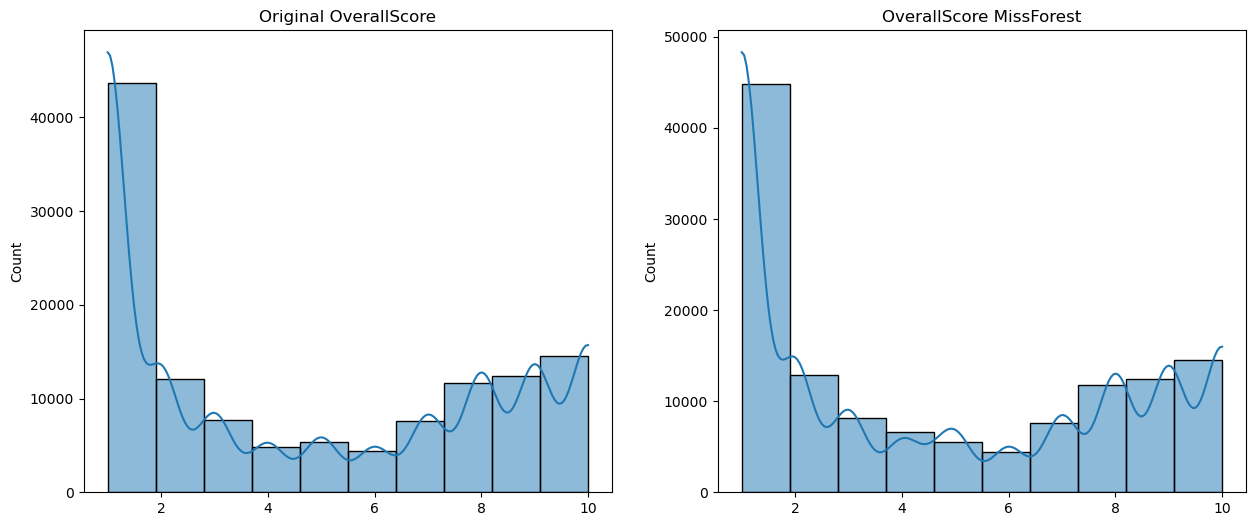

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(air.OverallScore, kde=True, bins=10)
plt.title('Original OverallScore')
plt.xlabel(None)

plt.subplot(122)
sns.histplot(data_imp[0], kde=True, bins=10)
plt.title('OverallScore MissForest')
plt.xlabel(None)

In [ ]:
air['OverallScore'] = data_imp[0]
air['OverallScore'] = air['OverallScore'].astype(int)

Se vuelven a checkear los porcentajes de nulos.

In [ ]:
air.isna().sum()*100/len(air)

AirlineName            0.0
CabinType              0.0
DatePub                0.0
EntertainmentRating    0.0
FoodRating             0.0
GroundServiceRating    0.0
OriginCountry          0.0
OverallScore           0.0
Recommended            0.0
Review                 0.0
SeatComfortRating      0.0
ServiceRating          0.0
Slug                   0.0
TravelType             0.0
ValueRating            0.0
WifiRating             0.0
unique_id              0.0
dtype: float64

No se encuentra ninguno.

## EDA

En primer lugar graficamos la cantidad de vuelos por tipo de cabina, siendo la mas predominante la clase económica, seguida por business.

<AxesSubplot:xlabel='CabinType', ylabel='count'>

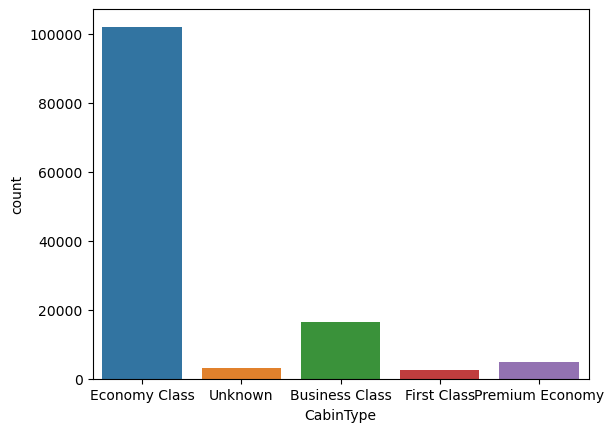

In [ ]:
sns.countplot(data=air, x='CabinType')

Se grafica cada uno de los distintos ratings y se colorea según si la persona recomienda o no la aerolinea; de esta manera se observa que es lo que la gente pondera al momento de emitir o no la recomendación. En general se observa como tendencia que a mayor rating en alguna categoría, mas recomendada es la aerolinea y viceversa (en algunas de ellas es mas claro que en otras). También se observa una cantidad importante de ratings 0 en diferentes categorías que aun asi recomiendan la aerolinea; esto podría deberse a un servicio no utilizado por el pasajero y por lo tanto no tenido en cuenta para la recomendación.

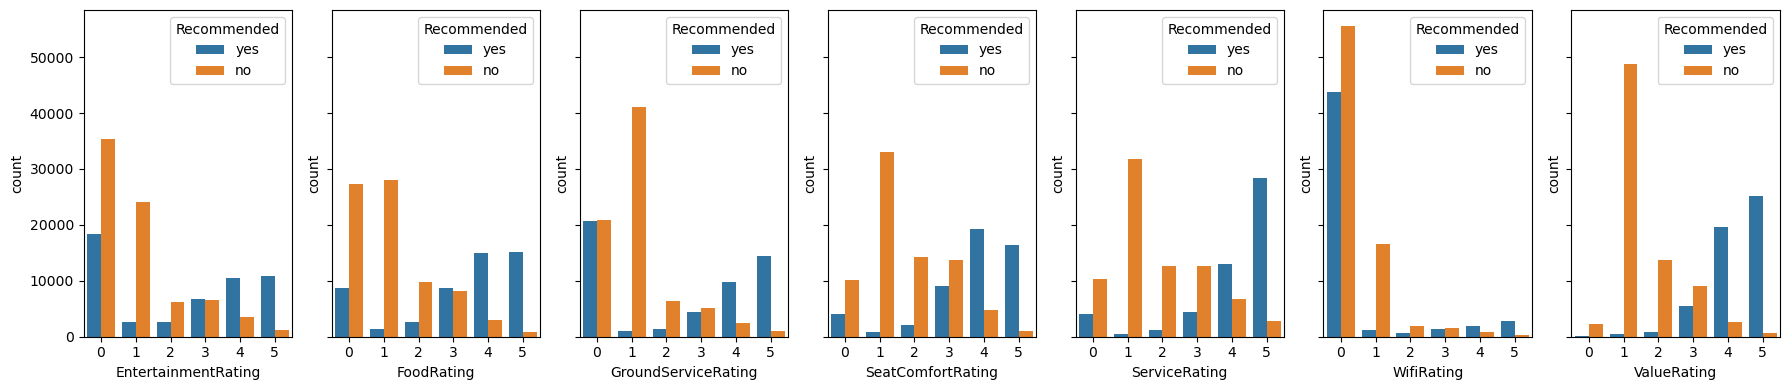

In [ ]:
ratings = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'WifiRating', 'ValueRating']

fig, axes = plt.subplots(1, 7, figsize=(18, 4), sharey=True)

for i in range(7):
    sns.countplot(data=air, x=ratings[i], ax=axes[i], hue='Recommended')

plt.tight_layout()
plt.show()

En cuanto a score general, la tendencia descripta anteriormente resulta aún mas evidente

<AxesSubplot:xlabel='OverallScore', ylabel='count'>

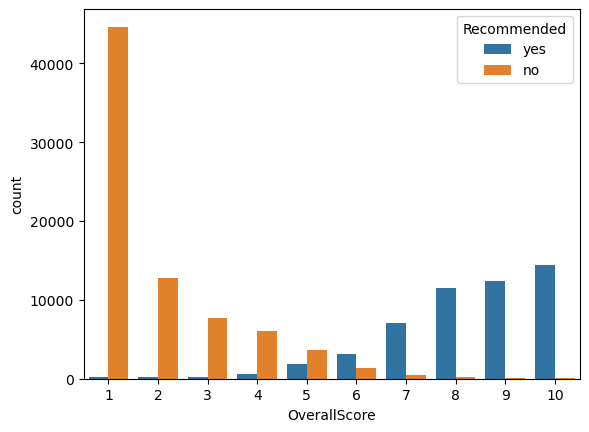

In [ ]:
sns.countplot(data=air, x='OverallScore', hue='Recommended')

Al observar el número de recomendaciones de las aerolineas (variable objetivo) se observa un leve desbalance entre las clases

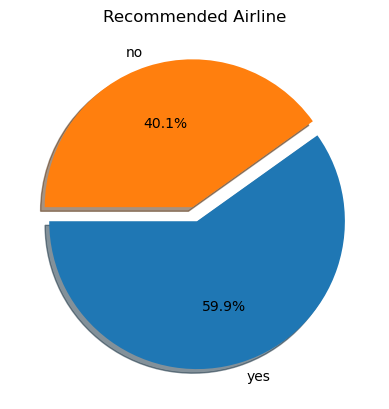

In [ ]:
explode = (0.05, 0.05)

fig, ax = plt.subplots()
ax.pie(air.Recommended.value_counts(), explode=explode, labels=air.Recommended.unique(), autopct='%1.1f%%',
       shadow=True, startangle=180)
ax.set_title('Recommended Airline')
plt.show()

Se realiza un histograma de la cantidad de palabras por review.

Text(0, 0.5, 'Frecuencia')

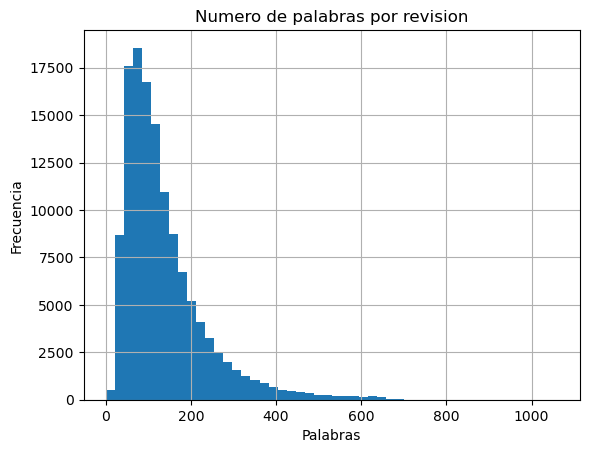

In [ ]:
words_per_review = air.Review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins=50)
plt.title('Numero de palabras por revision')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

## NLP

Se define una funcion que eliminará las stopwords de cada review, asi como los signos de puntuación, los cuales no aportan información útil para nuestro modelo.

In [ ]:
def remove_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word not in string.punctuation]
    return ' '.join(filtered_words)

Se crea una nueva columna con la review en minúscula y se le aplica luego la función definida.

In [ ]:
air['Review_lower'] = air.Review.apply(lambda x: x.lower())

air['Review_lower'] = air['Review_lower'].apply(remove_stopwords)

Comparativa de la review inicial y la misma luego del procesamiento.

In [ ]:
air[['Review', 'Review_lower']].head()

,Review,Review_lower
0,Moroni to Moheli. Turned out to be a pretty de...,moroni moheli turned pretty decent airline onl...
1,Moroni to Anjouan. It is a very small airline....,moroni anjouan small airline ticket advised tu...
2,Anjouan to Dzaoudzi. A very small airline and ...,anjouan dzaoudzi small airline airline based c...
3,Havana - Cayo Coco return. A one hour flight w...,havana cayo coco return one hour flight old at...
4,Holguin to Havana last week. Okay apart from i...,holguin havana last week okay apart issuing du...


Se vuelve a realizar un histograma de las palabras de reviews procesadas y se observa como las mismas han disminuido.

Text(0, 0.5, 'Frecuencia')

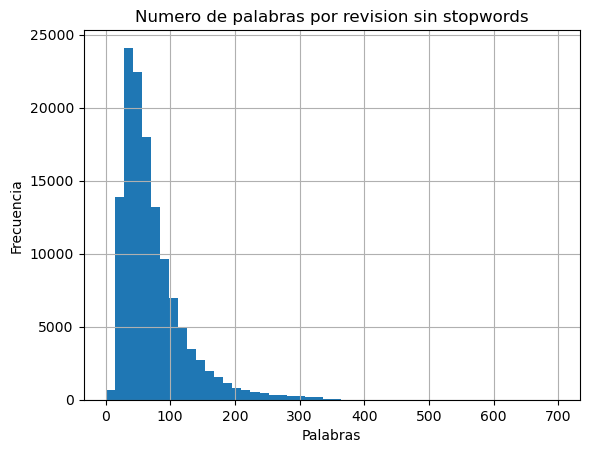

In [ ]:
words_per_review_stop = air.Review_lower.apply(lambda x: len(x.split(" ")))
words_per_review_stop.hist(bins=50)
plt.title('Numero de palabras por revision sin stopwords')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

Se inicializa un modelo preentrenado BERTweet de análisis de sentimiento; el mismo analiza el texto y devuelve un sentimiento positivo, negativo o neutro según corresponda. El modelo acepta 128 tokens como máximo, de manera que se truncan los mismos en dicho valor, los cuales deberían ser suficientes para identificar el sentimiento.

In [ ]:
sent_class = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis", max_length = 128, truncation = True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Se aplica el modelo a nuestra columna sin stopwords ni puntuaciones.

In [ ]:
air['Review_stmt'] = ''
air['Review_stmt'] = air['Review_lower'].apply(lambda x: sent_class(x)[0]['label'])

Esta última operación demandó varias hs en completarse, razón por la cual se guarda nuestro dataset ya procesado y listo para usar, de manera de no tener que repetir dicha operación a futuro.

In [ ]:
air.to_csv('air_final.csv', index=False)

## Selección de modelo y entrenamiento

In [ ]:
air = pd.read_csv('air_final.csv')
air.head()

,AirlineName,CabinType,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Slug,TravelType,ValueRating,WifiRating,unique_id,Review_lower,Review_stmt
0,AB Aviation,Economy Class,11th November 2019,0,4,4,Netherlands,9,yes,Moroni to Moheli. Turned out to be a pretty de...,4,5,ab-aviation,Solo Leisure,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,moroni moheli turned pretty decent airline onl...,POS
1,AB Aviation,Economy Class,25th June 2019,0,1,1,UnitedKingdom,1,no,Moroni to Anjouan. It is a very small airline....,2,2,ab-aviation,Solo Leisure,2,0,307711df-268f-4698-97b8-45729b7d972e,moroni anjouan small airline ticket advised tu...,NEG
2,AB Aviation,Economy Class,25th June 2019,0,1,1,UnitedKingdom,1,no,Anjouan to Dzaoudzi. A very small airline and ...,2,1,ab-aviation,Solo Leisure,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,anjouan dzaoudzi small airline airline based c...,NEU
3,Aerocaribbean,Economy Class,31st December 2010,0,0,0,Denmark,8,yes,Havana - Cayo Coco return. A one hour flight w...,0,0,aerocaribbean,Unknown,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,havana cayo coco return one hour flight old at...,POS
4,Aerocaribbean,Unknown,25th November 2010,0,0,0,UnitedKingdom,1,no,Holguin to Havana last week. Okay apart from i...,0,0,aerocaribbean,Unknown,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,holguin havana last week okay apart issuing du...,NEG


In [ ]:
air.isna().sum()

AirlineName            0
CabinType              0
DatePub                0
EntertainmentRating    0
FoodRating             0
GroundServiceRating    0
OriginCountry          0
OverallScore           0
Recommended            0
Review                 0
SeatComfortRating      0
ServiceRating          0
Slug                   0
TravelType             0
ValueRating            0
WifiRating             0
unique_id              0
Review_lower           0
Review_stmt            0
dtype: int64

Se arma el conjunto de variables independientes con los ratings para los diferentes items así como el general, y se dummean las variables categóricas ```TravelType``` y ```Review_stmt``` eliminando una columna de cada una (ya que se da implicitamente cuando las otras son 0).

La variable objetivo es la recomendación o no de la aerolínea, la cual se transforma a binaria para ser aceptada por todos los modelos.

In [ ]:
A = air[['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'OverallScore', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']]
B = pd.get_dummies(air[['TravelType','Review_stmt']], drop_first=True)

X = pd.concat([A,B],axis=1)
y = air.Recommended.map({'no':0, 'yes':1})

Se realizan 6 folds para los datos y se prueba un listado con varios modelos; los mismos se evaluan con el f1-score.

In [ ]:
kf = KFold(n_splits=6, random_state=42, shuffle=True)
models = []

models.append(DecisionTreeClassifier(random_state=42))
models.append(RandomForestClassifier(random_state=42))
models.append(KNeighborsClassifier())
models.append(LogisticRegression(random_state=42))
models.append(GaussianNB())
models.append(AdaBoostClassifier(random_state=42))
models.append(lgb.LGBMClassifier(random_state=42))

cv_results = []
for model in models:
    cv_results.append(cross_val_score(model, X, y, scoring = "f1", cv = kf, n_jobs=-1))

Se calcula para cada modelo su f1-Score medio y desviación estándar, usando los resultados para cada fold. Luego se grafica para que sea visualmente mas claro.

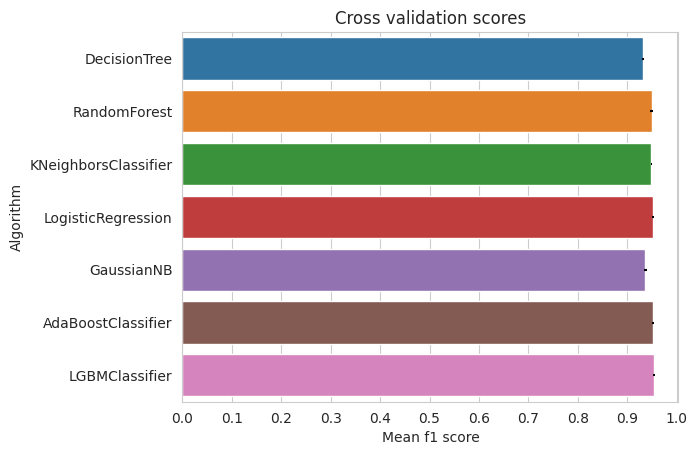

In [ ]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means, "CrossValerrors":cv_std, "Algorithm":["DecisionTree", "RandomForest", "KNeighborsClassifier",
"LogisticRegression", "GaussianNB", "AdaBoostClassifier", "LGBMClassifier"]})

sns.set_style('whitegrid')
g = sns.barplot(data = cv_res, x="CrossValMeans", y="Algorithm", orient = "h", **{'xerr':cv_std})
plt.xticks(np.arange(0, 1.1, .1))
g.set_xlabel("Mean f1 score")
g = g.set_title("Cross validation scores")

Todos los modelos tienen un rendimiento general muy bueno, resultando el LGBMClassifier levemente superior al resto.

In [ ]:
cv_means

[0.9316972267491975,
 0.9494326757098488,
 0.9489175094496572,
 0.9524529695765994,
 0.936873990532379,
 0.9530066096395218,
 0.9540573783758083]

## LGBMClassifier

Se inicializa un LGBMClassifier y se arma una red de parámetros posibles. Para buscar la mejor combinación de estos, se utiliza una busqueda aleatoria por mitades.

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=42)

lgbm_param_grid = {'num_leaves': [10, 20, 30],
                   'learning_rate': [0.1, 0.05, 0.01],
                   'max_depth': [2, 3, 5],
                   'n_estimators': [30, 50, 100]
                  }

gslgbm = HalvingRandomSearchCV(lgbm, param_distributions = lgbm_param_grid, cv = kf, scoring="f1", n_jobs= -1, verbose = 1)

gslgbm.fit(X, y)

lgbm_best = gslgbm.best_estimator_

print('\nf1-score para LGBMClassifier: ', gslgbm.best_score_.round(4))

print('\nParámetros óptimos para LGBMClassifier:\n', gslgbm.best_params_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 8
min_resources_: 24
max_resources_: 128631
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 24
Fitting 6 folds for each of 81 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 81 is smaller than n_iter=5359. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 27
n_resources: 72
Fitting 6 folds for each of 27 candidates, totalling 162 fits
----------
iter: 2
n_candidates: 9
n_resources: 216
Fitting 6 folds for each of 9 candidates, totalling 54 fits
----------
iter: 3
n_candidates: 3
n_resources: 648
Fitting 6 folds for each of 3 candidates, totalling 18 fits
----------
iter: 4
n_candidates: 1
n_resources: 1944
Fitting 6 folds for each of 1 candidates, totalling 6 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 51622, number of negative: 77009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 128631, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg

Habiendo obtenido los mejores parámetros, se arma el modelo con estos.

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=42, num_leaves=30, n_estimators=100, max_depth=2, learning_rate=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 36143, number of negative: 53898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 90041, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401406 -> initscore=-0.399610
[LightGBM] [Info] Start training from score -0.399610


<Axes: >

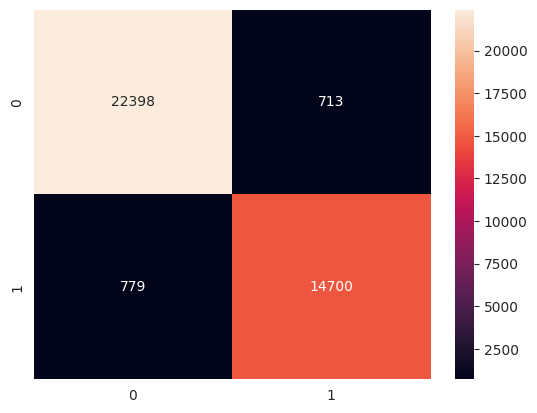

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')

El modelo resulta muy bueno para identificar ambas clases. Se observan buenas métricas tanto para precision como para recall, con valores acotados para errores tipo I y II.

In [ ]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      0.97      0.97     23111
         Yes       0.95      0.95      0.95     15479

    accuracy                           0.96     38590
   macro avg       0.96      0.96      0.96     38590
weighted avg       0.96      0.96      0.96     38590



Se grafican las características y la importancia que le da el modelo a cada una; siendo las mas predominantes el score general, rating del valor por dinero, rating del confort del asiento y rating del servicio.

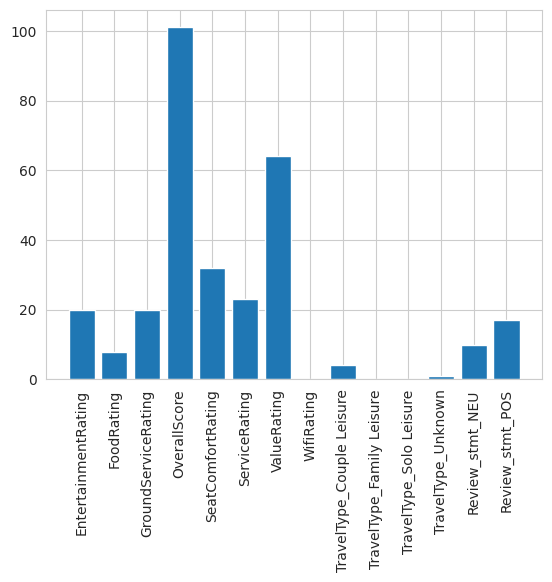

In [ ]:
plt.bar(X.columns, lgbm.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## Conclusiones

A través de nuestro análisis, hemos podido identificar que items o servicios la gente valora en mayor o menor medida. Por ejemplo, el entretenimiento a bordo, la comida, servicios en tierra y wifi; son servicios que ya sea porque no se ofrecen, o al menos no de manera gratuita en alguna aerolinea (low costs por ejemplo) o la gente no utiliza (servicios en tierra si el pasajero simplemente realiza un check in) no influyen demasiado en la recomendación o no de una aerolinea. Esto ya era observable durante la etapa de EDA: se advertía una cantidad considerables de valores con puntuación 0 que aun así recomendaban la aerolinea. Esto indica una baja importancia asignada por el pasajero a dicho item.

Por el contrario, servicios o items ponderados por todos, como confort del asiento, valor por dinero, servicio o puntuación general tienen una gran correlación con la recomendación o no de la aerolinea.

Si una aerolinea busca incrementar su market share, debe indefectiblemente centrarse en estos puntos. Por ejemplo, ampliar el espacio entre asientos (lugar para las piernas), centrarse en mejorar el material acolchado de los mismos, implementar campañas de promoción o descuento de pasajes o reforzar la atención de la tripulación.